<a href="https://colab.research.google.com/github/dearmypoem/2022-2-ITB/blob/main/ibh_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **연습1: Chipotle 주문 데이터 이용**
**(1)  가장 잘 팔리지 않은 (주문량이 가장 적은) 메뉴 10개를 보여 주세요.**


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
chipo = pd.read_csv("/content/drive/My Drive/Colab Notebooks/itb/chipotle.csv")

item_count = chipo["item_name"].value_counts()
print(item_count[-10:]) 

Veggie Salad                         6
Carnitas Salad Bowl                  6
Burrito                              6
Steak Salad                          4
Crispy Tacos                         2
Salad                                2
Bowl                                 2
Chips and Mild Fresh Tomato Salsa    1
Veggie Crispy Tacos                  1
Carnitas Salad                       1
Name: item_name, dtype: int64


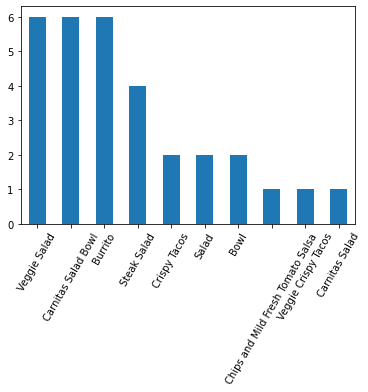

In [ ]:
item_count[-10:].plot.bar(rot=60)



**(2)  가격이 가장 저렴한 메뉴 5개를 보여주세요.**

In [ ]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [ ]:
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby("item_name")["item_price"].min() 

print(price_per_item.sort_values(ascending = False)[-5:])

item_name
Chips                1.99
Side of Chips        1.69
Canned Soft Drink    1.25
Canned Soda          1.09
Bottled Water        1.09
Name: item_price, dtype: float64


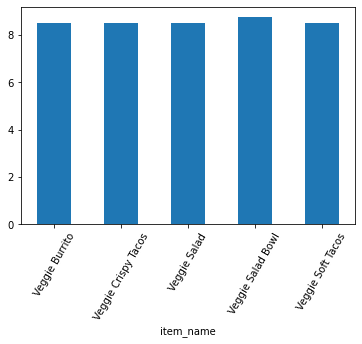

In [ ]:
price_per_item[-5:].plot.bar(rot=60)

### **연습2: 공공 데이터 이용**
공공 데이터 중 하나를 정해서 다운로드 받으시오. 다운로드 받은 데이터를 구글 드라이브에 업로드 후  앞에서 배운 코드들을 이용하여 (1) 기본적인 기술통계 정보, (2) 데이터 시각화를 통해 데이터를 탐색해 보시오. 


[공공 데이터 링크](https://www.data.go.kr/data/15078148/fileData.do)

In [ ]:
museum = pd.read_csv("/content/drive/My Drive/Colab Notebooks/itb/museum.csv", encoding="cp949")
## 서울특별시_서울시립미술관 이용객 수 현황

museum["연월"] = museum["연월"].astype(str) 

display(museum.head(10))
print(museum.info())

,연월,이용객 수
0,2011-01,234587
1,2011-02,171376
2,2011-03,260687
3,2011-04,56204
4,2011-05,279310
5,2011-06,178302
6,2011-07,34784
7,2011-08,79331
8,2011-09,57239
9,2011-10,76839


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      120 non-null    object
 1   이용객 수   120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB
None


In [ ]:
print(museum.describe())

               이용객 수
count     120.000000
mean   136192.900000
std     72264.000703
min         0.000000
25%     94601.000000
50%    133977.000000
75%    167761.500000
max    384284.000000


In [68]:
## 이용객 수가 가장 많은 연월 상위 20
visitor = museum.groupby("연월")["이용객 수"].min()
print(visitor.sort_values(ascending = False)[:20]) 

연월
2013-09    384284
2019-07    325318
2013-08    309217
2011-05    279310
2019-08    278993
2017-08    275547
2012-07    265630
2017-07    264731
2012-08    263250
2011-03    260687
2016-07    246683
2017-06    236393
2011-01    234587
2013-10    231982
2012-12    225727
2016-05    224462
2016-08    205932
2013-11    204426
2016-06    196737
2015-08    196562
Name: 이용객 수, dtype: int64
